In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Advanced concepts

- Broadcasting and broadcasting rules
- Special indexing
- Masked indexing


## Simple broadcasting examples


In [2]:
a = np.array([1.0, 2, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

In [3]:
a = np.ones((3, 3))
b = np.array([1, 2, 3])
a * b

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [4]:
b*a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [5]:
a = np.array([1.0, 2, 3.0])
a.T

array([1., 2., 3.])

In [6]:
a = np.array([1.0, 2, 3.0])
b = np.ones(5)
a * b

ValueError: operands could not be broadcast together with shapes (3,) (5,) 

## Broadcasting rules

- Consider `A <operator> B`

- Compare their shapes element-wise starting with the rightmost dimension
  going left.

- Two dimensions are compatible if:

  - they are equal
  - or one of them is 1

- Do not need the same number of dimensions


## Illustration

<br/>

<img height="80%" src="images/broadcasting_1.png" align="center"/>

<br/>
<span style="font-size:50%" >
Image source: https://numpy.org/doc/stable/user/basics.broadcasting.html
</span>


## Examples

- From the documentation!

```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3
```

```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```


```
A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3
```


## Examples


In [7]:
a = np.fromfunction(lambda i, j: 10*i, (4, 3))
a

array([[ 0.,  0.,  0.],
       [10., 10., 10.],
       [20., 20., 20.],
       [30., 30., 30.]])

In [8]:
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [9]:
b = np.array([1.0, 2.0, 3.0, 4.0]).reshape((4, 1))
a + b

array([[ 1.,  1.,  1.],
       [12., 12., 12.],
       [23., 23., 23.],
       [34., 34., 34.]])

## Illustration

<br/>

<img height="80%" src="images/broadcasting_2.png" align="center"/>

<br/>
<span style="font-size:50%" >
Image source: https://numpy.org/doc/stable/user/basics.broadcasting.html
</span>


## Examples

- Introducing a new axis


In [10]:
# No magic!
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

- Use `np.newaxis` or `None`

In [11]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

## Illustration

<br/>

<img height="80%" src="images/broadcasting_4.png" align="center"/>

<br/>
<span style="font-size:50%" >
Image source: https://numpy.org/doc/stable/user/basics.broadcasting.html
</span>


## Special indexing

- Can be indexed using arrays of indices

In [12]:
a = np.arange(12)**2
i = np.array([10, 1, 3, 8, 5])
a[i] 

array([100,   1,   9,  64,  25])

In [13]:
j = np.array([[3, 4], [9, 7]])
a[j]

array([[ 9, 16],
       [81, 49]])

In [14]:
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [ ]:
a[i] =4
a

## More examples

- ND: indices for each dimension must have same shape


In [15]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [16]:
i = np.array([[0, 1],
              [1, 2]])
j = np.array([[2, 1],
              [3, 3]])
a[i, j]

array([[ 2,  5],
       [ 7, 11]])

Warning:

In [ ]:
a[i]

In [ ]:
a[np.array([i, j])]

## Indexing with a boolean array


In [ ]:
a = np.arange(12).reshape(3, 4)
b = a > 4
b

In [ ]:
a[b]

In [ ]:
a[b] = 21
a

In [ ]:
b = (a > 4) | (a%3 == 0)
b

## Creating a grid of points

- A box of 25x25 points between $[-2, -2]$ to $[2, 2]$


In [ ]:
xo, yo = -2, -2
n = 25
dx = dy = 4.0/(n - 1)
x = np.fromfunction(lambda i, j: xo + i*dx, (n, n))
y = np.fromfunction(lambda i, j: yo + j*dy, (n, n))

In [ ]:
plt.scatter(x, y);

In [ ]:
np.mgrid[-1:1:5j]

In [ ]:
# Easier way
x, y = np.mgrid[-2:2:100j, -2:2:100j]
# See also meshgrid
#plt.contourf(x, y, np.sin(x*x + y*y));

## Exercise

- Plot interior of the unit circle


In [ ]:
cond = (x*x + y*y < 1)
plt.scatter(x, y);
plt.scatter(x[cond], y[cond]);
plt.axis('equal');

## Computing the Mandelbrot set

- Putting everything we learned together

<img height="90%" src="images/mandelbrot.png" align="center"/>


## Algorithm: pseudocode

```python
result = np.zeros((nx, ny))

for i in range(nx):
    for j in range(ny):
        iters = 0
        z = 0
        while np.abs(z) < 2 and iters < 20:
           z = z**2 + Z[i, j]
           iters += 1
        result[i, j] = iters
```

Fleshed out.

In [17]:
%%time
nx, ny = 1600, 1200
result = np.zeros((nx, ny))
x, y = np.mgrid[-2.5:1.5:nx*1j, -1.5:1.5:ny*1j]
Z = x + 1j*y
for i in range(nx):
    for j in range(ny):
        iters = 0
        z = 0
        while np.abs(z) < 2 and iters < 20:
           z = z**2 + Z[i, j]
           iters += 1
        result[i, j] = iters

CPU times: user 18.2 s, sys: 43.7 ms, total: 18.3 s
Wall time: 18.3 s


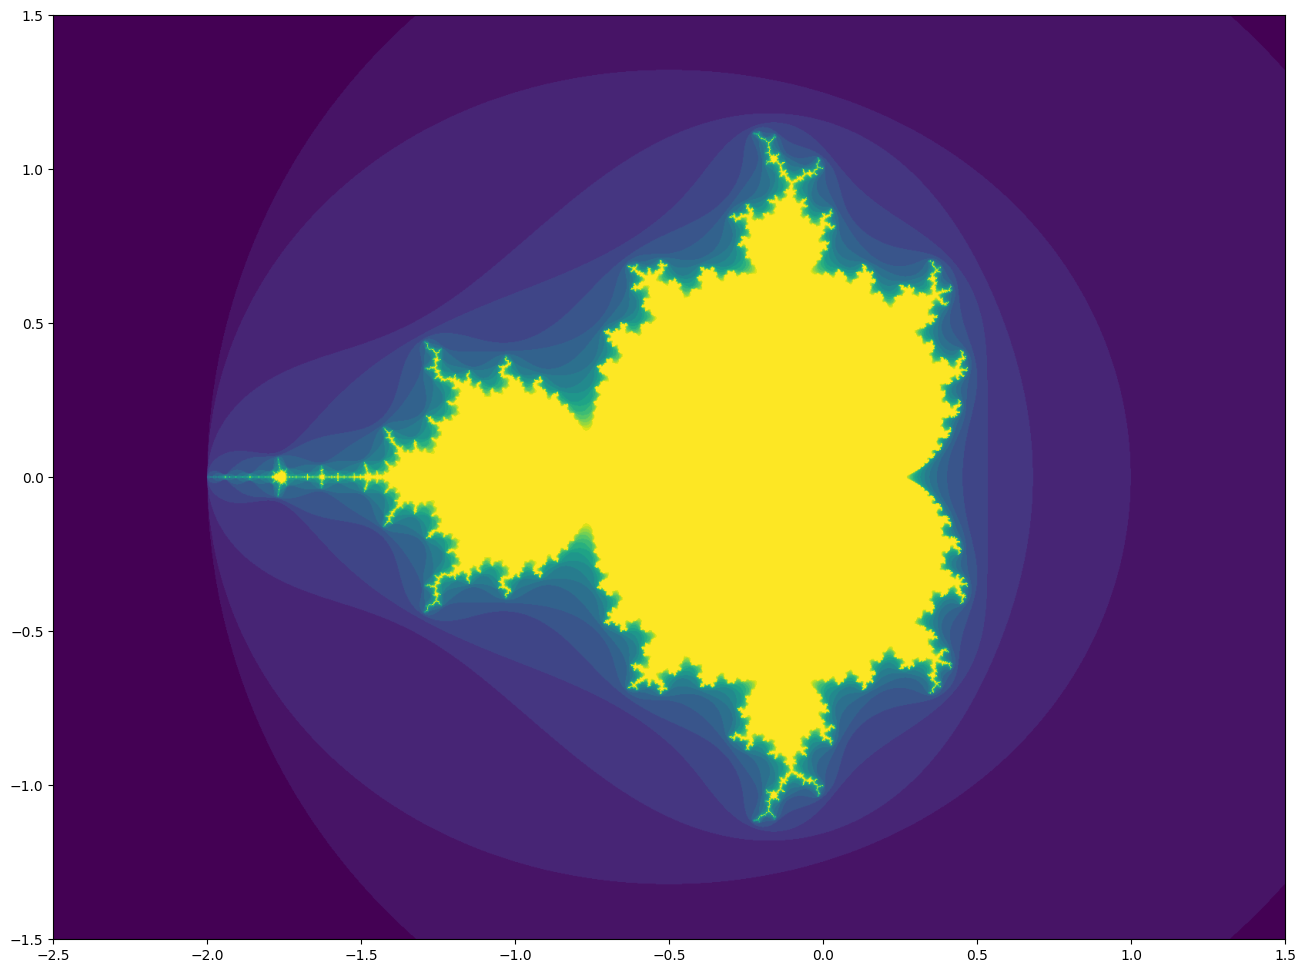

In [18]:
plt.figure(figsize=(16, 12))
plt.imshow(result.T, extent=[-2.5, 1.5, -1.5, 1.5]);

## Redo with numpy


In [19]:
%%time
nx, ny = 1600, 1200
result = np.zeros((nx, ny))
x, y = np.mgrid[-2.5:1.5:nx*1j, -1.5:1.5:ny*1j]
Z = x + 1j*y
z = np.zeros_like(Z)
for count in range(20):
    z = z**2 + Z
    cond = (np.abs(z) >= 2) & (result < 1 )
    result[cond] = count
    z[np.abs(z) >= 2] = 0.0
result[(result < 1)] = 19

CPU times: user 1.92 s, sys: 76.1 ms, total: 2 s
Wall time: 2 s


In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(result.T, extent=[-2.5, 1.5, -1.5, 1.5]);

## Solution


In [ ]:
%%time
nx, ny = 1600, 1200
result = np.ones((nx, ny))*19
x, y = np.mgrid[-2.5:1.5:nx*1j, -1.5:1.5:ny*1j]
Z = x + 1j*y
z = np.zeros_like(Z)
div = np.ones_like(z, dtype=bool)
for i in range(20):
    ndiv = ~div
    z[ndiv] = z[ndiv]**2 + Z[ndiv]
    #z = z**2 + Z
    div = np.abs(z) > 2
    result[div & (result == 19)] = i


In [ ]:
plt.imshow(result.T, extent=[-2.5, 1.5, -1.5, 1.5]);